# 2차원 데이터 : 두 테이터 사이의 관계를 나타내는 지표

In [14]:
import numpy as np
import pandas as pd

%precision 3
pd.set_option('precision', 3)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

두 변수 사이의 관계 측도
* 수치형 변수간의 관계 : Pearson's correlation
    * 자료가 정규분포임을 가정
    * 두 변수 형태가 interval 또는 ratio인 경우
    * 두 자료 간의 선형적인 관계를 파악
    * 예. 대입시험 점수와 대학 졸업 학점 간의 상관관계
* 순서형 변수간의 관계 : Kendall's tau, Spearman correlation
    * Ordinal척도 자료간 상관관계를 파악할 수 있는 비모수적 방법(정규분포를 벗어날 때 사용)
    * 한 변수가 증가할 때 다른 변수가 증가 혹은 감소하는지 파악
    * 예. 고입시험 등수와 대입시험 등수 간의 관계
* 범주형 변수간의 관계 : 카이제곱검정 - Phi correlation
    * Ordinal척도 자료간 상관관계를 파악할 수 있는 비모수적 방법(정규분포를 따르지 않을 때)
    * 한 변수가 증가할 때 다른 변수가 증가 혹은 감소하는지 파악?
    * 예. 두 심사위원이 부여한 등수 간의 관계

두 변수간의 관계 시각화
* 범주형 변수간의 관계 시각화 : 모자익플롯(Mosaic plot)
* 수치형 변수간의 관계 시각화 : 산점도(scatter plot), Heat Map
* 범주형 변수, 수치형 변수의 시각화 : Box plot, Bar Chart

In [10]:
df = pd.read_csv('../data/ch2_scores_em.csv', index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [11]:
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english': en_scores, 'ma_scores': ma_scores},
                        index=pd.Index(['A','B','C','D','E','F','G','H','I','J'],
                                       name='student'))
scores_df

,english,ma_scores
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


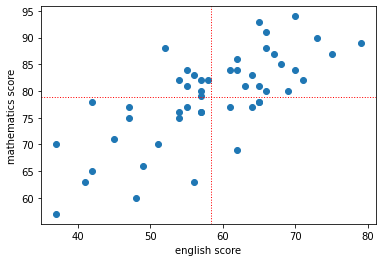

In [12]:
import matplotlib.pyplot as plt

plt.scatter(df['english'], df['mathematics'])
plt.xlabel('english score')
plt.ylabel('mathematics score')

plt.axhline(y=df['mathematics'].mean(), color='r', linewidth=1, linestyle=':')
plt.axvline(x=df['english'].mean(), color='r', linewidth=1, linestyle=':')

plt.show()

### 공분산(convariance)

: 두 변수 사이의 관계성 척도

In [18]:
# 각 과목의 편차 및 과목간 공분산
summary_df = df.copy()

summary_df['eng_dev.'] = summary_df['english']-summary_df['english'].mean()
summary_df['math_dev.'] = summary_df['mathematics']-summary_df['mathematics'].mean()
summary_df['productOfDev.'] = summary_df['eng_dev.']*summary_df['math_dev.']
summary_df.head()

,english,mathematics,eng_dev.,math_dev.,productOfDev.
student number,,,,,
1,42,65,-16.38,-13.88,227.354
2,69,80,10.62,1.12,11.894
3,56,63,-2.38,-15.88,37.794
4,41,63,-17.38,-15.88,275.994
5,57,76,-1.38,-2.88,3.974


In [19]:
summary_df['productOfDev.'].mean()
# 각 학생별 영어와 수락의 공분산 평균이 58.49이므로 영어와 수학은 양의 상관 관계에 있음

58.486

* numpy의 공분산 함수 : cov(data1, data2, ddof)
    * 반환값 : 공분산 행렬
    * 반환 행렬 중 [0,1]과 [1,0]의 원소가 공분산 값
    * [0,0], [1,1]의 원소는 각 데이터의 분산 값

In [21]:
cov_mat = np.cov(df['english'], df['mathematics'], ddof=0) # 모집단의 공분산
cov_mat

array([[94.116, 58.486],
       [58.486, 69.386]])

In [22]:
cov_mat[0,1], cov_mat[1,0]

(58.4856, 58.4856)

In [23]:
# 각 과목의 분산
# 영어의 분산
cov_mat[0,0]
# 수학의 분산
cov_mat[1,1]

94.11560000000001

69.38559999999995

In [24]:
np.var(df['english'])
np.var(df['mathematics'])

94.116

69.386

### 상관계수
* 공분산은 단위의 제곱으로 표현되어 직관적으로 이해하기 어려움
    * 예. 시험 점수간의 공분산(점수X점수), 키와 점수간의 공분산(cmX점수)
* 단위에 의존하지 않는 상관성을 나타내는 지표)
* 상관계수는 공분산을 각 데이터의 표준편차로 나누어 단위에 의존하지 않음
* 양의 상관은 1에 가까워지고, 음의 상관은 -1에 가까워지고, 무상관은 0
* 상관계수가 -1일 때와 1일 때는 완전히 직선상에 놓임

In [26]:
# 수식으로 상관계수 이해하기
np.cov(df['english'], df['mathematics'], ddof=0)[0,1]/(np.std(df['english'])*np.std(df['mathematics']))

0.7237414863069244

In [28]:
# 상관계수 함수1 : np.corrcoef(x,y)
np.corrcoef(df['english'], df['mathematics'])

array([[1.   , 0.724],
       [0.724, 1.   ]])

In [29]:
# 상관계수 함수2 : pandas.DataFrame.corr()
df.corr()

,english,mathematics
english,1.000,0.724
mathematics,0.724,1.000


# 2차원 데이터의 시각화

### 산점도

In [32]:
import matplotlib.pyplot as plt

%matplotlib inline

Text(0.5, 0, 'english')

Text(0, 0.5, 'mathematics')

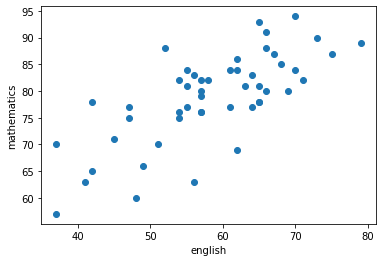

In [33]:
# 산점도
plt.scatter(df['english'], df['mathematics'])
plt.xlabel('english')
plt.ylabel('mathematics')
plt.show()

### 회귀직선

Text(0.5, 0, 'english')

Text(0, 0.5, 'mathematics')

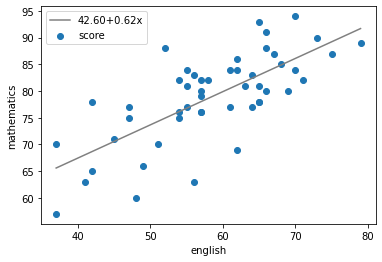

In [40]:
# 계수 β_0와 β_1를 구한다(기울기와 절편)
poly_fit = np.polyfit(df['english'], df['mathematics'], 1)

# β_0+β_1 x를 반환하는 함수를 작성
poly_1d = np.poly1d(ploy_fit)

# 직선을 그리기 위한 x좌표
xs = np.linspace(df['english'].min(), df['english'].max())

# xs에 대응하는 y좌표
ys = poly_1d(xs)

plt.xlabel('english')
plt.ylabel('mathematics')
plt.scatter(df['english'], df['mathematics'], label='score')
plt.plot(xs, ys, color='gray', label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')

# 범례의 표시
plt.legend(loc='upper left')
plt.show()

### 히트맵
* 히스토그램의 2차원 버전으로 색을 이용해 표현하는 그래프
* 영어 점수 35점부터 80점, 수학 점수 55점부터 95점까지 5점 간격

Text(0.5, 0, 'english')

Text(0, 0.5, 'mathematics')

([<matplotlib.axis.XTick at 0x1fa1e6e2c10>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

([<matplotlib.axis.YTick at 0x1fa1e6f5700>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

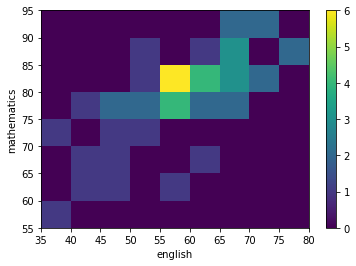

In [43]:
c = plt.hist2d(df['english'],df['mathematics'], bins=(9,8), range=[(35,80),(55,95)])

c[3]

plt.xlabel('english')
plt.ylabel('mathematics')
plt.xticks(c[1])
plt.yticks(c[2])

plt.colorbar(c[3])
plt.show()